In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import math

# REMOVING UNNECESSARY FEATURES AND ONE-HOT-ENCODING

In [24]:
df = pd.read_csv("carprices.csv")

In [25]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


*Dropping car_ID and CarName features because they are redundant to the dataset*

In [26]:
df = df.drop(['car_ID','CarName'], axis = 1)

*One-Hot-Encoding peakrpm, fuelsystem because a majority of them are located in the front*

In [27]:
df = pd.get_dummies(df, columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                                 'drivewheel', 'enginetype', 
                                 'cylindernumber' , 'enginelocation' ,'symboling', 'fuelsystem'], drop_first = True)

df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,symboling_1,symboling_2,symboling_3,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,True,False,False,False,False,True,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,True,False,False,False,False,True,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,True,False,False,False,False,False,False,True,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,False,True,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,False,False,False,False,False,False,False,True,False,False
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,False,False,False,False,False,False,False,True,False,False
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,False,False,False,False,False,False,False,True,False,False
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,False,False,False,False,False,True,False,False,False,False


*Plotting the histplot of price in the dataframe to check the distribution about normal*

<Axes: xlabel='price', ylabel='Count'>

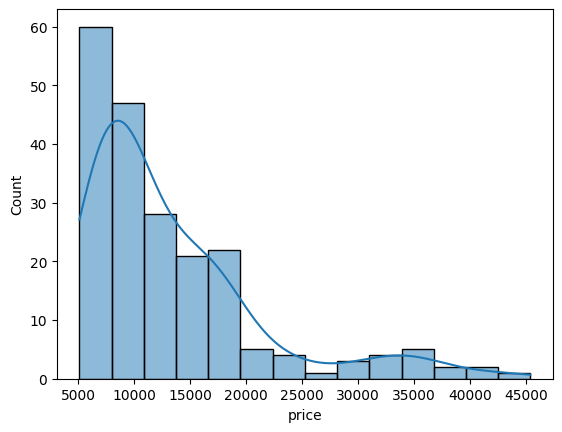

In [28]:
sns.histplot(df['price'], kde = True)

*This plot indicates that this is a Non-normal distribution about the mean*

## Taking the Non-hot-encoded columns

In [29]:
non_hot_encoded = df.select_dtypes(['int64','float64']).columns

*The one hot encoded values are of uint8 data type, thus they get excluded*

In [30]:
non_hot_encoded = non_hot_encoded.drop('price')

*Replacing the cell values with their Z-scores*

In [31]:
for i in non_hot_encoded:
    df[i] = (df[i] - df[i].mean())/df[i].std()
df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,symboling_1,symboling_2,symboling_3,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,...,False,False,True,False,False,False,False,True,False,False
1,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,...,False,False,True,False,False,False,False,True,False,False
2,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,0.602571,-2.399008,0.684271,-0.287645,1.261448,...,True,False,False,False,False,False,False,True,False,False
3,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,...,False,True,False,False,False,False,False,True,False,False
4,0.106848,0.206750,0.229440,0.235366,0.515545,0.218350,-0.516003,0.461055,-0.539405,0.275209,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.717669,1.195622,1.394830,0.726460,0.761377,0.338419,1.662375,-0.336147,-0.161765,0.249921,...,False,False,False,False,False,False,False,True,False,False
201,1.717669,1.195622,1.348215,0.726460,0.947672,0.338419,1.662375,-0.336147,-0.363173,1.413178,...,False,False,False,False,False,False,False,True,False,False
202,1.717669,1.195622,1.394830,0.726460,0.876611,1.106861,0.923942,-1.229012,-0.337997,0.755685,...,False,False,False,False,False,False,False,True,False,False
203,1.717669,1.195622,1.394830,0.726460,1.270327,0.434474,-1.180593,0.461055,3.236992,0.047616,...,False,False,False,False,False,True,False,False,False,False


## Removing the Outliers using Z-score
## Anything falling outside the range of -3 to 3 will be considered an outlier

In [32]:
for i in non_hot_encoded:
    outliers = df.loc[(df[i] < -3) | (df[i] > 3)]

    if not outliers.empty:
        print("outliers in the feature \n", i)
        print()
        print(outliers.loc[:,i])
    else:
        print("outliers are not present : ", i)

outliers in the feature 
 wheelbase

73    3.677223
Name: wheelbase, dtype: float64
outliers are not present :  carlength
outliers are not present :  carwidth
outliers are not present :  carheight
outliers are not present :  curbweight
outliers in the feature 
 enginesize

47    3.148036
48    3.148036
49    4.780975
73    4.348726
74    4.252671
Name: enginesize, dtype: float64
outliers are not present :  boreratio
outliers in the feature 
 stroke

111   -3.397400
113   -3.397400
134   -3.780057
Name: stroke, dtype: float64
outliers in the feature 
 compressionratio

63     3.161464
158    3.111112
159    3.111112
174    3.111112
182    3.236992
184    3.236992
187    3.236992
192    3.236992
203    3.236992
Name: compressionratio, dtype: float64
outliers in the feature 
 horsepower

49     3.992572
129    4.650065
Name: horsepower, dtype: float64
outliers in the feature 
 peakrpm

165    3.092081
166    3.092081
Name: peakrpm, dtype: float64
outliers in the feature 
 citympg

18    3

*Deleting the outliers from the dataset*

In [33]:
for i in non_hot_encoded:
    df = df.query(f"({i} <= 3) & ({i} >= -3)")

df.reset_index(drop = True, inplace = True)

## Checking for Data redunancy

In [34]:

dfcorr = df.select_dtypes(include=['float64', 'int64']).corr()
dfcorr = dfcorr.drop(['price'] )
dfcorr = dfcorr.drop(['price'] , axis  = 1 )

dfcorr

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
wheelbase,1.000000,0.852368,0.786984,0.641451,0.739084,0.506814,0.481204,0.212342,0.451432,0.302416,-0.362596,-0.401549,-0.485576
carlength,0.852368,1.000000,0.835202,0.530854,0.864825,0.676225,0.633290,0.188920,0.296600,0.549088,-0.294193,-0.654429,-0.691982
carwidth,0.786984,0.835202,1.000000,0.329619,0.845903,0.697493,0.540278,0.253883,0.336216,0.580943,-0.209815,-0.631395,-0.683243
carheight,0.641451,0.530854,0.329619,1.000000,0.363776,0.154245,0.234309,-0.026778,0.301641,-0.037641,-0.318732,-0.080657,-0.152222
curbweight,0.739084,0.864825,0.845903,0.363776,1.000000,0.847753,0.655416,0.207274,0.352694,0.736997,-0.282606,-0.762429,-0.813440
enginesize,0.506814,0.676225,0.697493,0.154245,0.847753,1.000000,0.593002,0.219347,0.220866,0.806652,-0.258275,-0.672102,-0.690829
boreratio,0.481204,0.633290,0.540278,0.234309,0.655416,0.593002,1.000000,-0.139118,0.219136,0.542945,-0.322948,-0.560274,-0.572966
stroke,0.212342,0.188920,0.253883,-0.026778,0.207274,0.219347,-0.139118,1.000000,0.207970,0.116382,-0.008061,-0.124034,-0.112867
compressionratio,0.451432,0.296600,0.336216,0.301641,0.352694,0.220866,0.219136,0.207970,1.000000,-0.075518,-0.442339,0.118698,0.035211
horsepower,0.302416,0.549088,0.580943,-0.037641,0.736997,0.806652,0.542945,0.116382,-0.075518,1.000000,0.116377,-0.832377,-0.802764


*We can also visualise this using a heatmap*

<Axes: >

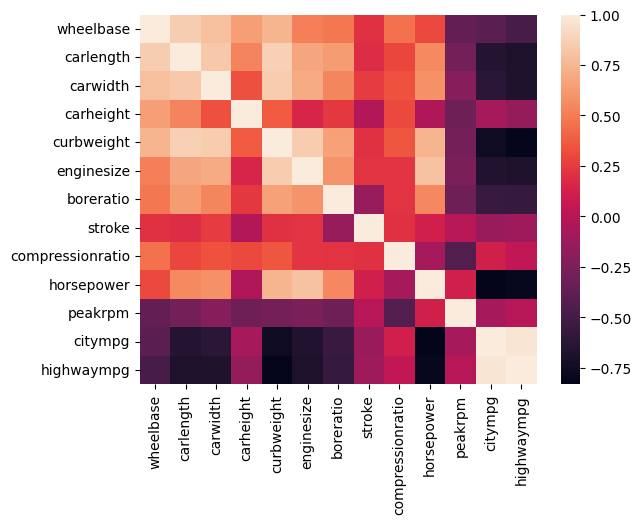

In [35]:
sns.heatmap(dfcorr)

*From the above data, since citympg and highwaympg are highly correlated at 0.96, we can eliminate one of them*

In [36]:
df = df.drop(['citympg'], axis = 1)

## Now that preprocessing is done, linear regression can be implemented

## First we need to split the data into a training set and testing set

In [37]:
X = df.drop(['price'], axis = 1)
Y = df['price']

*The prices in the data form the output values, with the set of X values being the parameters*

*Dividing the data, 70% into training and 30% into testing*

In [50]:
#Training set
i = int(0.7 * len(df))
X_train = X[:i]
Y_train = Y[:i]

#Testing set
X_test = X[i:]
Y_test = Y[i:]

*Let us look at the shapes of each dataframe*

In [51]:
print(X.shape, Y.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(182, 46) (182,) (127, 46) (127,) (55, 46) (55,)


*Importing classes from other files in this repository for linear regression and statistical methods*

In [52]:
from LR import LinearRegression
from SM import StatisticalMethods


*Training the model*

In [53]:
linearreg = LinearRegression()
linearreg.fit(X_train , Y_train)

*Obtaining predictions from the model*

In [55]:
y_predicted  = linearreg.predict(X_test)

print(y_predicted)

[5941.370625299672 8886.686076027674 8833.084921302801 11799.18382892578
 9996.747959467897 11844.195489430094 8323.423306872819 10853.717759042444
 8281.877105699677 11538.196110343048 4693.081279574228 4943.267537936698
 3497.8025030685253 4542.082278027914 4516.260668782204 6530.311700992761
 6775.991271667921 5511.737160197483 5656.946652841436 5888.959646387329
 7274.617473877719 10029.090715542014 8773.609357206695 15965.166926746251
 15955.342287564736 15708.361479546484 16306.573138303895
 16108.715526193217 16506.649166967745 9837.67545189496 8984.667329110649
 10284.01245312157 9092.738360107312 21139.81250204258 21238.058893857728
 20531.831299637553 18743.39848864953 10853.431421969355 9476.738861371789
 9631.476928480648 11281.935874469797 9822.976374579395 10236.236634117982
 15770.45347916573 11526.291921897413 19365.521418910284
 18713.979076752137 19422.013094203998 18733.62835511517
 20933.871946935396 20257.768006823462 20910.801899589656
 23344.824890450014 22616.98

*Using other metrics to measure data deviation*

In [56]:
#MEAN-SQUARE-ERROR

checker = StatisticalMethods()
print("Mean square error is : ", checker.MSE(Y_test, y_predicted))

Mean square error is :  8842650.210130824


In [57]:
#RMSE

print("RMSE is : ", checker.RMSE(Y_test, y_predicted))

RMSE is :  2973.659397128532


In [58]:
#R-Squared

print("R-squared eror is : ", checker.Rsquared(Y_test, y_predicted))

R-squared eror is :  0.7401581450405768


## Actual v/s predicted values

*Plotting a predicted values vs actual value graph*

Text(0, 0.5, 'predicted values')

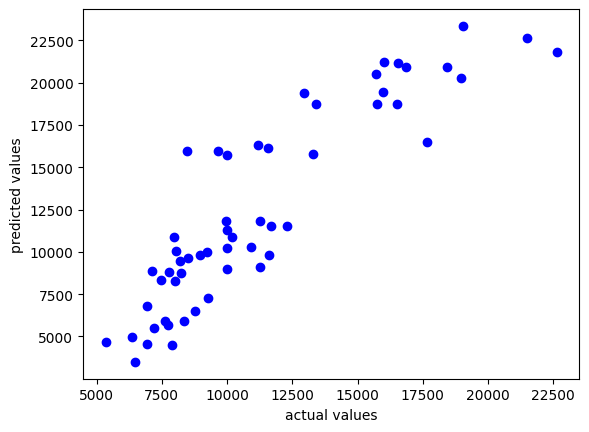

In [59]:
plt.scatter(Y_test, y_predicted, color = "blue", label = "Predicted vs actual")
plt.xlabel("actual values")
plt.ylabel("predicted values")

*Adding a 45-degree line for reference*

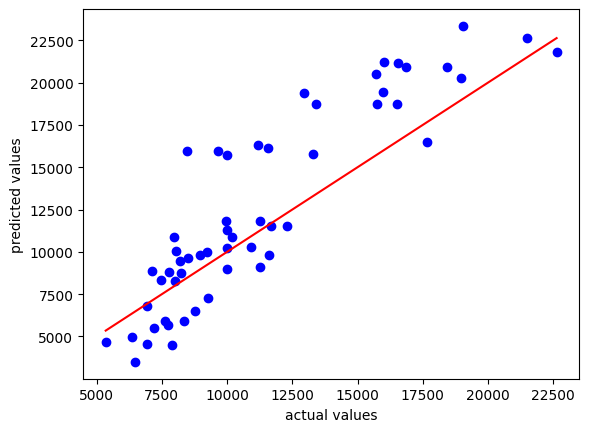

In [60]:
plt.scatter(Y_test, y_predicted, color = "blue", label = "Predicted vs actual")
plt.xlabel("actual values")
plt.ylabel("predicted values")

plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color = "red", label = "Ideal Fit")

## Residual Distribution

*plot between the residuals and the predictions*

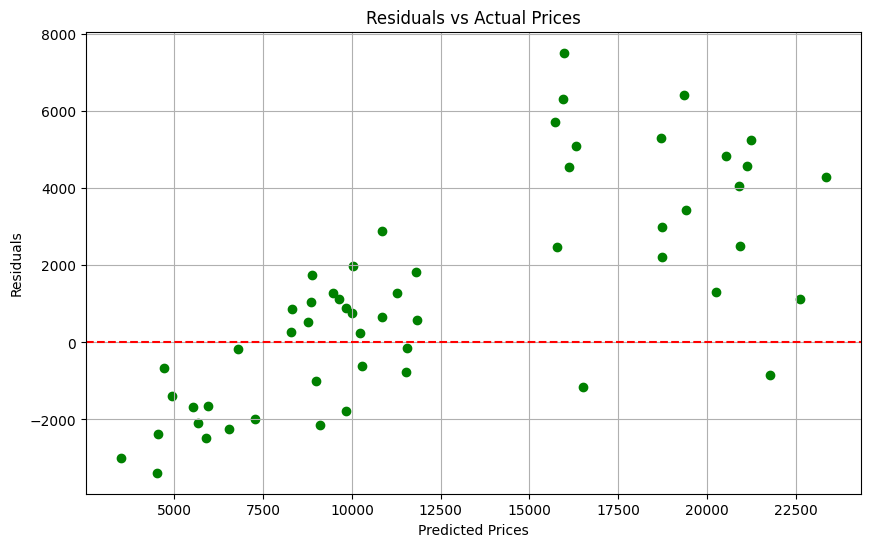

In [62]:
plt.figure(figsize = (10,6))
plt.scatter(y_predicted, y_predicted - Y_test, color = "green")
plt.axhline(0, color = 'red', linestyle = "--")
plt.title('Residuals vs Actual Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid()
plt.show()

*plotting residuals against prices*

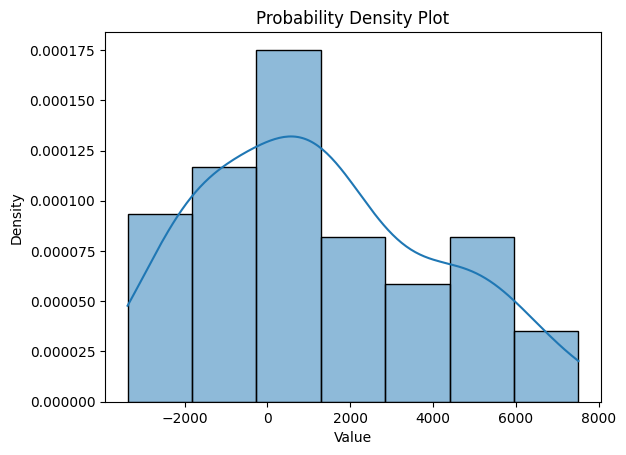

In [65]:
sns.histplot(y_predicted - Y_test, kde=True, stat="density")
plt.title("Probability Density Plot")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()